# Setup the dataset

Downloaded the dataset.

In [48]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("newslab/cholecseg8k")

print("Path to dataset files:", path)

Path to dataset files: /Users/confused_qy/.cache/kagglehub/datasets/newslab/cholecseg8k/versions/11


Look at the data struct.

In [49]:
import os

print("Dataset directory structure: ")
for root, dirs, files in os.walk(path):
    print(root)
    break

Dataset directory structure: 
/Users/confused_qy/.cache/kagglehub/datasets/newslab/cholecseg8k/versions/11


In [50]:
def print_tree(startpath, depth=2):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, "").count(os.sep)
        if level > depth:
            continue
        indent = " " * 4 * level
        print(f"{indent}{os.path.basename(root)}/")
        subindent = " " * 4 * (level + 1)
        for f in files[:5]:  # 每层只显示前 5 个文件
            print(f"{subindent}{f}")

print_tree(path, depth=2)
print(path)

11/
    video01/
        video01_28660/
            frame_28662_endo_watershed_mask.png
            frame_28714_endo_mask.png
            frame_28703_endo_mask.png
            frame_28738_endo_watershed_mask.png
            frame_28732_endo_color_mask.png
        video01_28580/
            frame_28636_endo.png
            frame_28637_endo.png
            frame_28644_endo_mask.png
            frame_28594_endo_color_mask.png
            frame_28653_endo_mask.png
        video01_28740/
            frame_28749_endo_watershed_mask.png
            frame_28777_endo_watershed_mask.png
            frame_28789_endo_color_mask.png
            frame_28763_endo_color_mask.png
            frame_28811_endo_watershed_mask.png
        video01_16425/
            frame_16478_endo.png
            frame_16479_endo.png
            frame_16448_endo_color_mask.png
            frame_16483_endo_watershed_mask.png
            frame_16431_endo.png
        video01_15019/
            frame_15085_endo.png
          

Example figures of the dataset.

/Users/confused_qy/.cache/kagglehub/datasets/newslab/cholecseg8k/versions/11


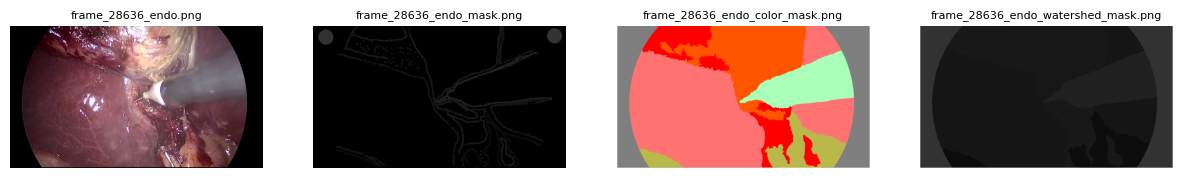

In [ ]:
import cv2
import matplotlib.pyplot as plt

def show_multiple(base_path, filenames):
    plt.figure(figsize=(15, 5))
    for i, filename in enumerate(filenames, 1):
        target_path = None
        for root, dirs, files in os.walk(base_path):
            if filename in files:
                target_path = os.path.join(root, filename)
                break
        if target_path:
            img = cv2.imread(target_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, len(filenames), i)
            plt.imshow(img)
            plt.title(filename, fontsize=8)
            plt.axis("off")
        else:
            print(f"❌ 没找到: {filename}")
    plt.show()

# 示例：对比一组图片
print(path)
show_multiple(path, [
    "frame_28636_endo.png",
    "frame_28636_endo_mask.png",
    "frame_28636_endo_color_mask.png",
    "frame_28636_endo_watershed_mask.png"
])